In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from featurewiz import featurewiz
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [61]:
from google.colab import drive
drive.mount('/content/drive')
import joblib
# Save to Google Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
np.random.seed(1234)

#load data
path = os.path.join(os.getcwd(), "sold_cleaned_11.21.23.csv")
data = pd.read_csv(path)


#inspect if data has any missing value
data.info()

#check data detailed info to see if any uncommon number
des=data.describe()


#drop unnecessary columns
data=data.drop(["property_url","mls","mls_id","status","street","unit","city","state","full_baths","half_baths","days_on_mls",\
                "list_price","list_date","last_sold_date","lot_sqft","latitude","longitude","stories","hoa_fee","parking_garage","metro_area"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304925 entries, 0 to 304924
Data columns (total 43 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   property_url                              304925 non-null  object 
 1   mls                                       283580 non-null  object 
 2   mls_id                                    283580 non-null  object 
 3   status                                    304925 non-null  object 
 4   style                                     304925 non-null  object 
 5   street                                    304871 non-null  object 
 6   unit                                      70926 non-null   object 
 7   city                                      304925 non-null  object 
 8   state                                     304925 non-null  object 
 9   zip_code                                  304925 non-null  int64  
 10  beds                

# New Section

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'sold_price'}>,
        <Axes: title={'center': 'price_per_sqft'}>,
        <Axes: title={'center': 'Household Median Income'}>],
       [<Axes: title={'center': 'Total population'}>,
        <Axes: title={'center': 'age over 35 and less than 85'}>,
        <Axes: title={'center': 'age over 35 and less than 85 percentage '}>,
        <Axes: title={'center': 'Total housing units'}>,
        <Axes: title={'center': 'Occupied housing units/ Totla Household'}>],
       [<Axes: title={'center': 'Occupied housing units Percent (%)'}>,
        <Axes: title={'center': 'Owner-occupied'}>,
        <Axes: title={'center': 'Renter-occupied'}>,
        <Axes: title={'center': 'Vacant housing units'}>,
        <Axes: title={'center': 'Vacant housing units Percent (%)'}>],
       [<Axes: title={'center': 'Homeowner vacancy rate'}>,
        <Axes: title={'center': 'Rental vacancy rate'}>

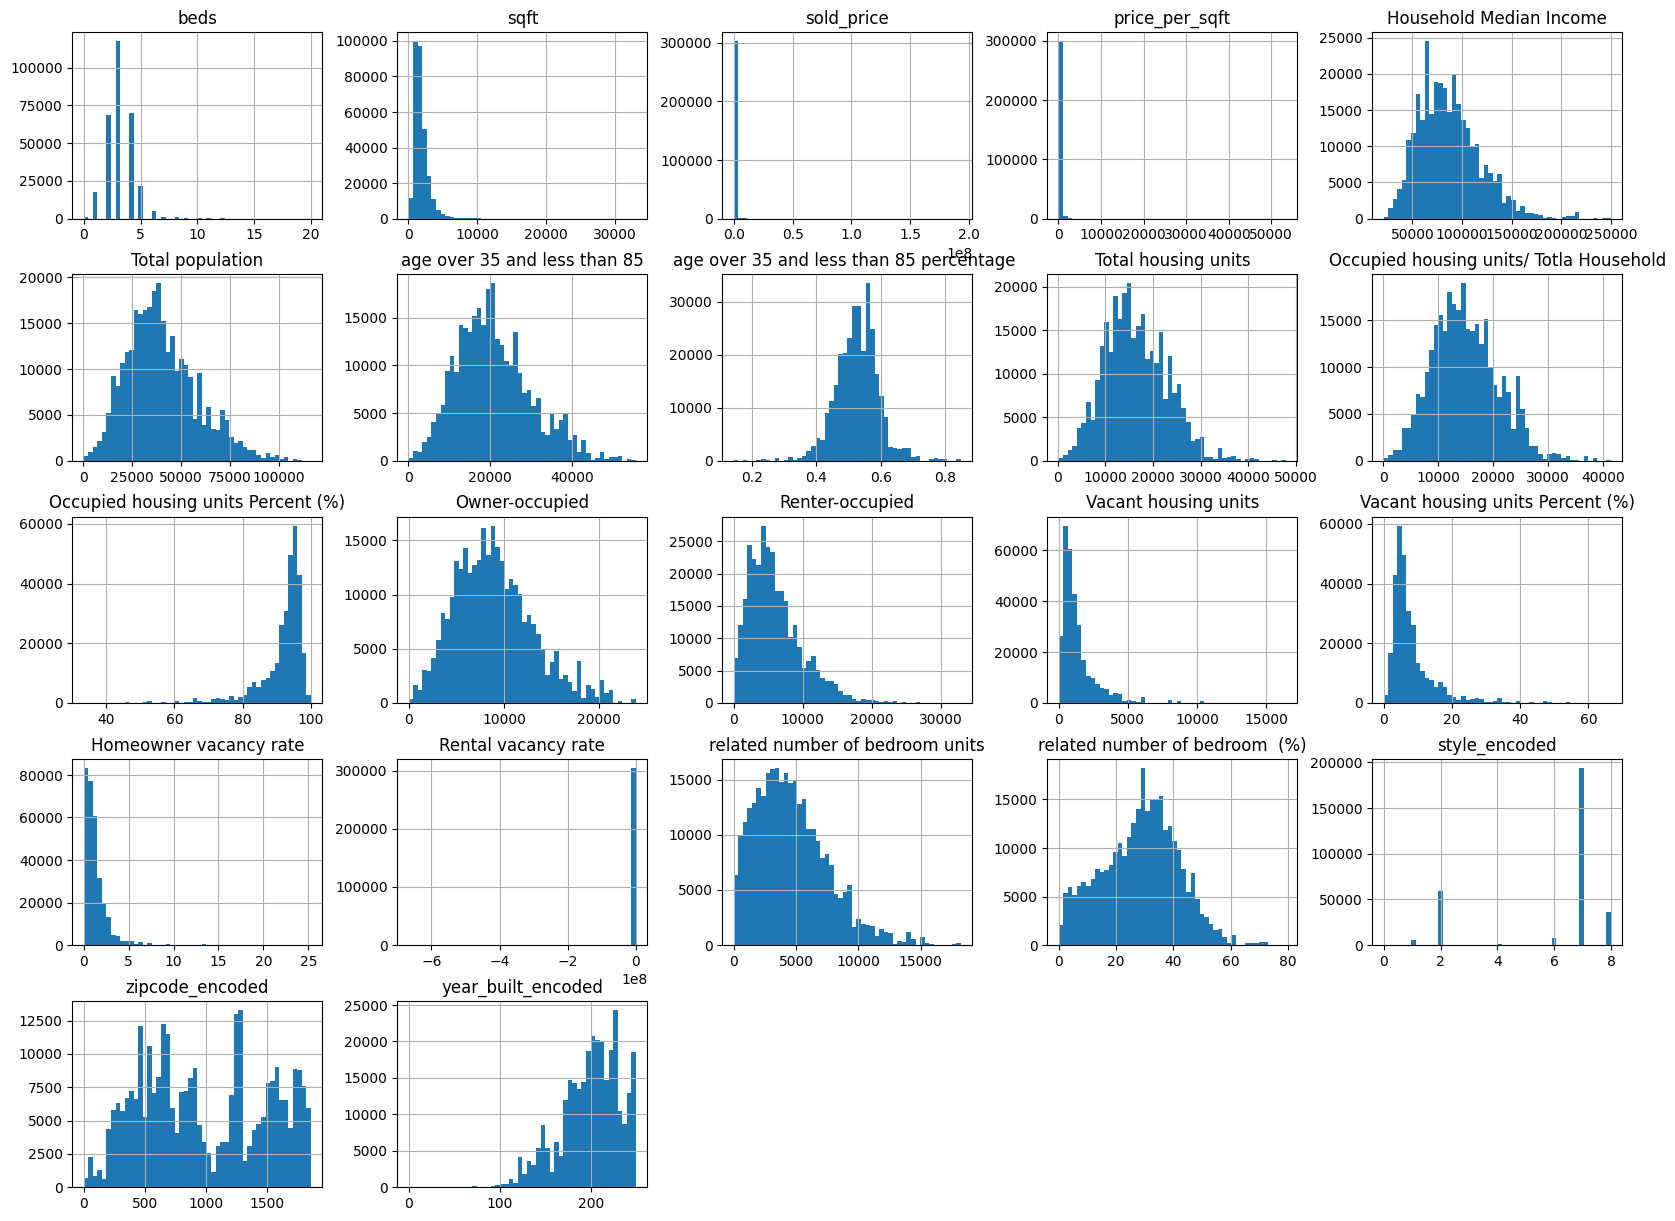

In [63]:
# make label for categorical features
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform style,zipcode, year_built columns to categorical data
data['style_encoded'] = label_encoder.fit_transform(data['style'].astype(str))
data['zipcode_encoded'] = label_encoder.fit_transform(data['zip_code'].astype(str))
data['year_built_encoded'] = label_encoder.fit_transform(data['year_built'].astype(str))

#drop style,zipcode, year_built columns
data=data.drop(["style","zip_code","year_built"],axis=1)

#plot historgram for all features
data.hist(bins=50,figsize=(20,15))

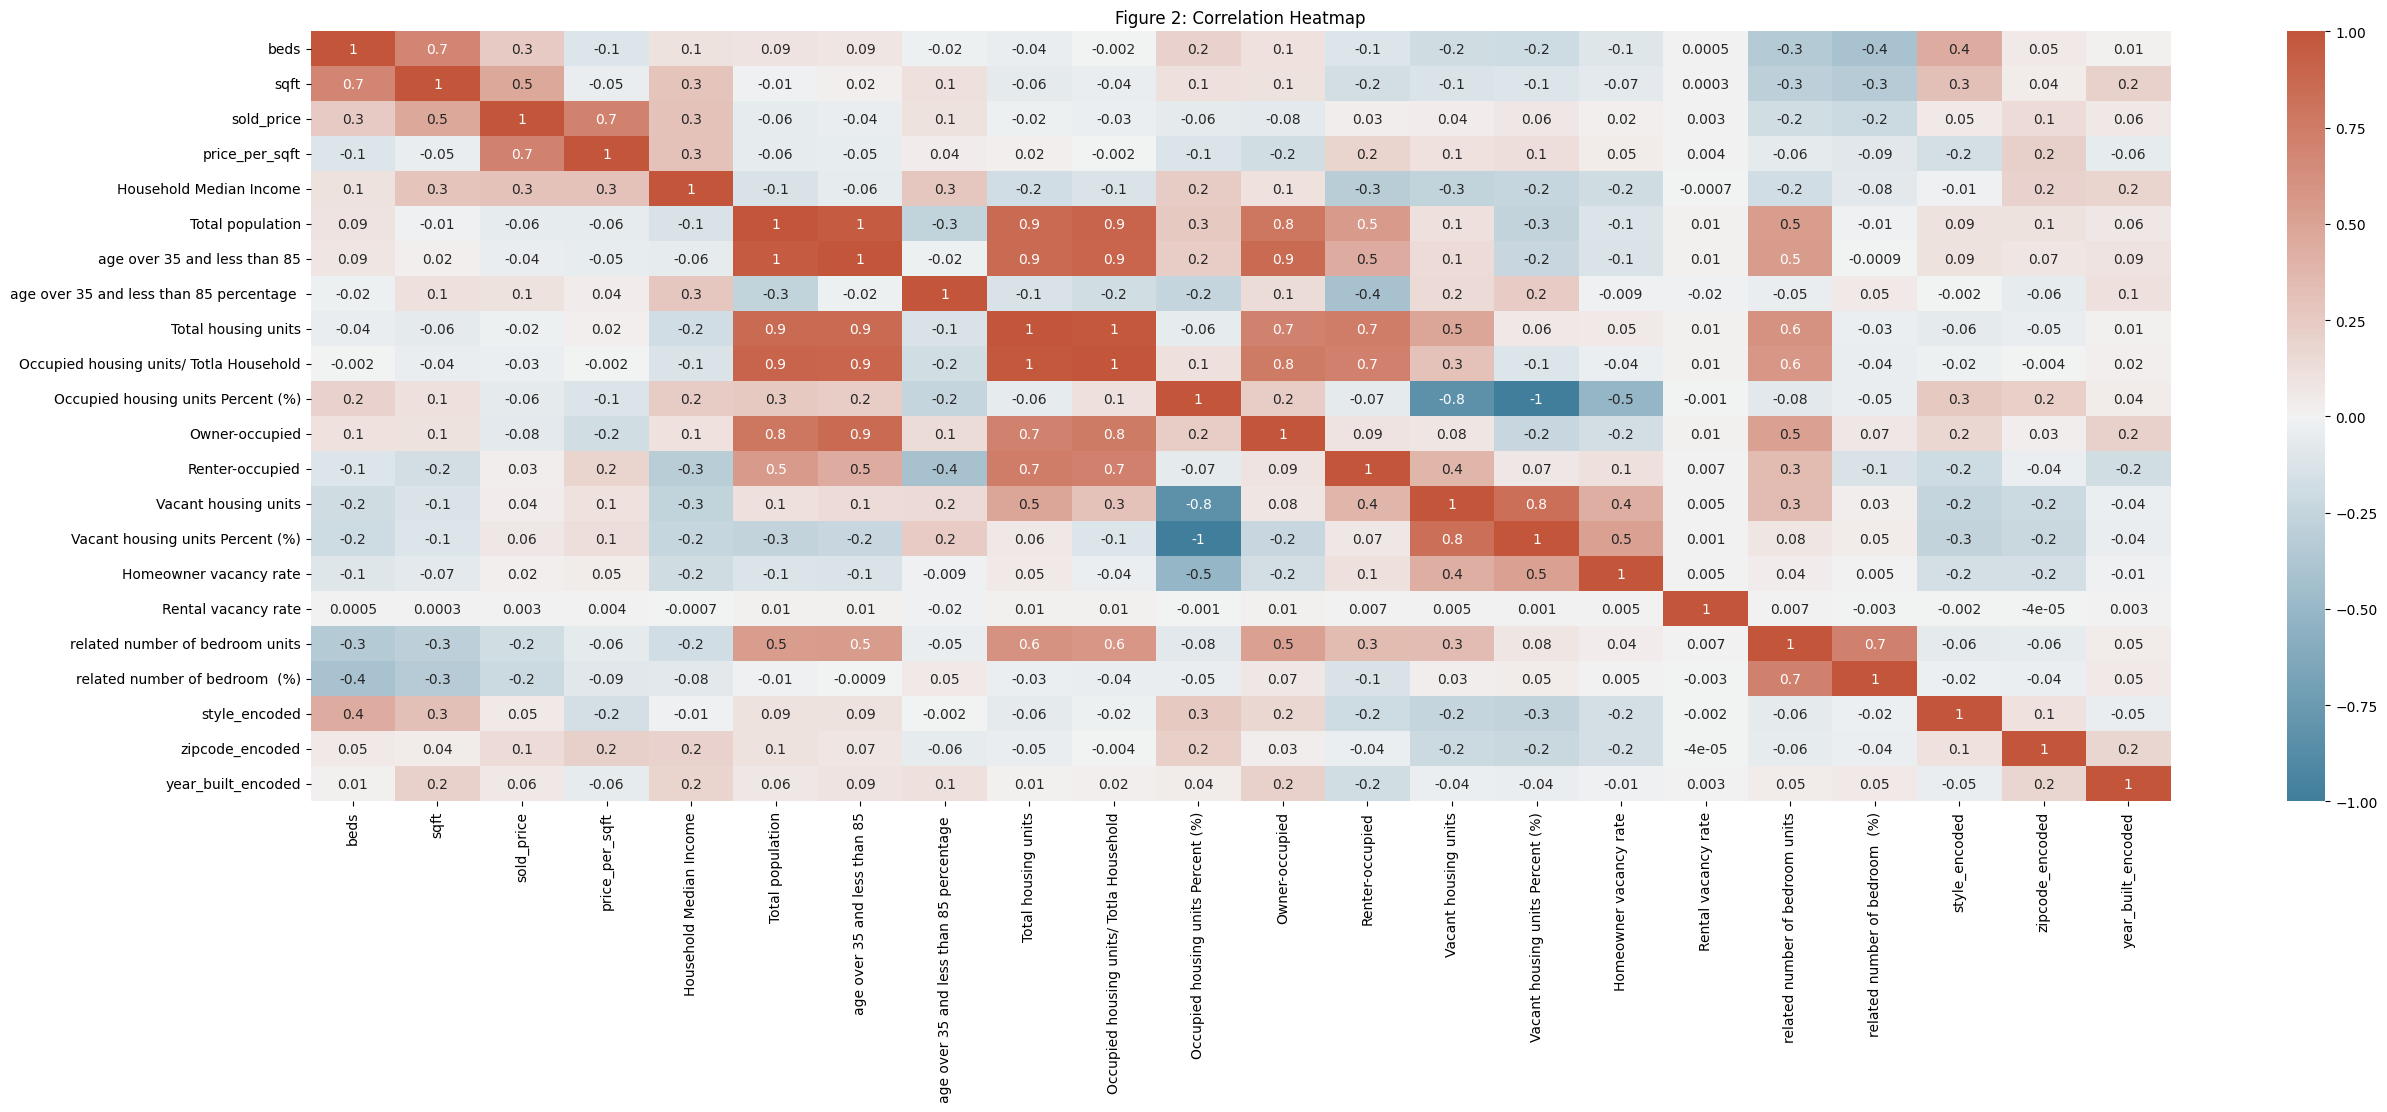

In [64]:
#check the correlation between each feature
corrDf = data.corr()
corrDf['sold_price'].sort_values(ascending=False)

#plot heatmap
cmap = sn.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(30,10))
sn.heatmap(corrDf, annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap=cmap)
plt.title("Figure 2: Correlation Heatmap",fontsize="large")

#extract the highly correlated pairs with absolute correlation over 0.05
corr_pairs = corrDf.unstack()
highly_corr_pairs=corr_pairs[(abs(corr_pairs)>=0.05)&(abs(corr_pairs)<1)].sort_values()

In [65]:
#normalize data for numerica features(use MinMaxScaler, StandardScaler based on data distribution or other feature)
columns_to_minmax_scale = ['sqft', 'price_per_sqft','Occupied housing units Percent (%)','Vacant housing units Percent (%)',\
                           'Homeowner vacancy rate','Rental vacancy rate']
columns_to_standardize = ['Household Median Income', 'Total population','age over 35 and less than 85','age over 35 and less than 85 percentage ',\
                         'Total housing units','Occupied housing units/ Totla Household','Owner-occupied','Renter-occupied',\
                           'Vacant housing units','related number of bedroom units','related number of bedroom  (%)']

# Apply Min-Max scaling to selected columns
minmax_scaler = MinMaxScaler()
data[columns_to_minmax_scale] = minmax_scaler.fit_transform(data[columns_to_minmax_scale])

# Apply Standardization to selected columns
standard_scaler = StandardScaler()
data[columns_to_standardize] = standard_scaler.fit_transform(data[columns_to_standardize])

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'sold_price'}>,
        <Axes: title={'center': 'price_per_sqft'}>,
        <Axes: title={'center': 'Household Median Income'}>],
       [<Axes: title={'center': 'Total population'}>,
        <Axes: title={'center': 'age over 35 and less than 85'}>,
        <Axes: title={'center': 'age over 35 and less than 85 percentage '}>,
        <Axes: title={'center': 'Total housing units'}>,
        <Axes: title={'center': 'Occupied housing units/ Totla Household'}>],
       [<Axes: title={'center': 'Occupied housing units Percent (%)'}>,
        <Axes: title={'center': 'Owner-occupied'}>,
        <Axes: title={'center': 'Renter-occupied'}>,
        <Axes: title={'center': 'Vacant housing units'}>,
        <Axes: title={'center': 'Vacant housing units Percent (%)'}>],
       [<Axes: title={'center': 'Homeowner vacancy rate'}>,
        <Axes: title={'center': 'Rental vacancy rate'}>

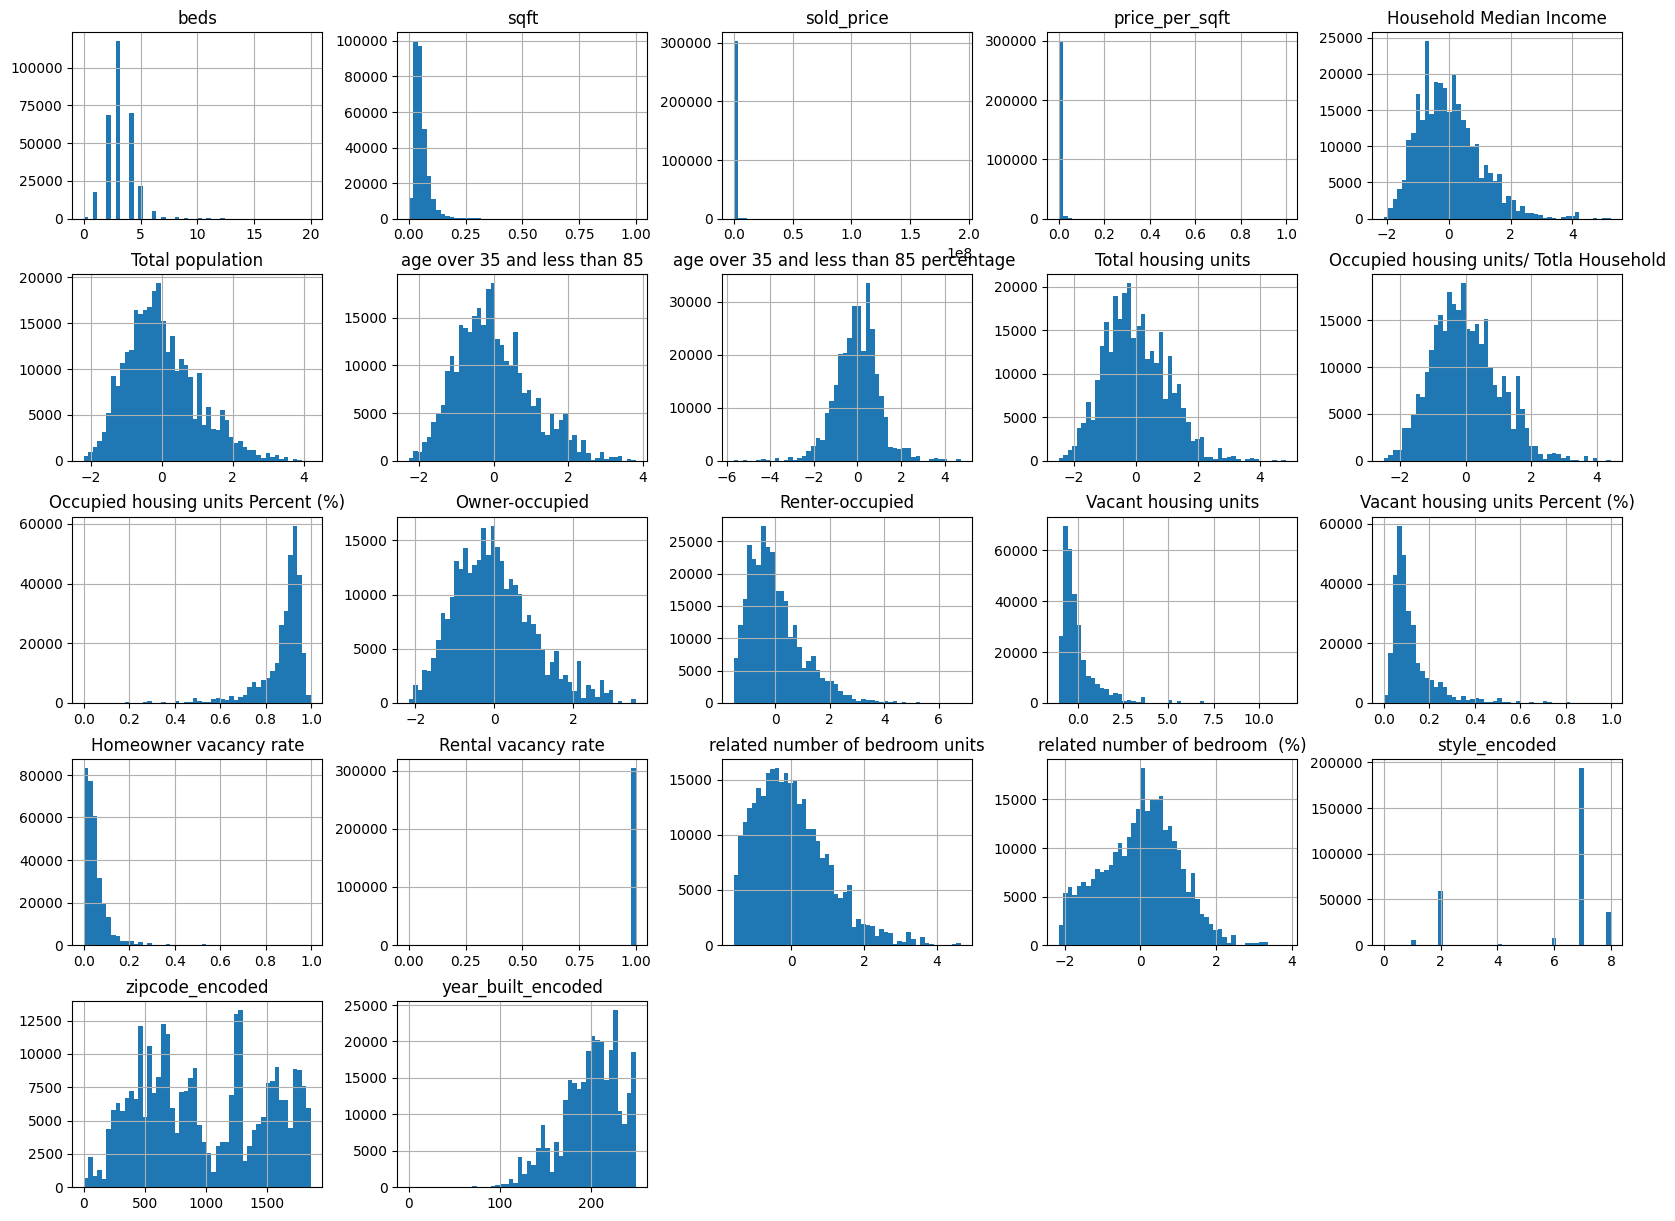

In [66]:
data.hist(bins=50,figsize=(20,15))

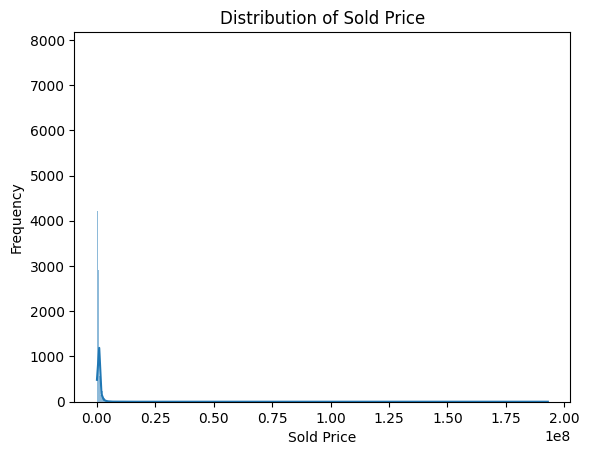

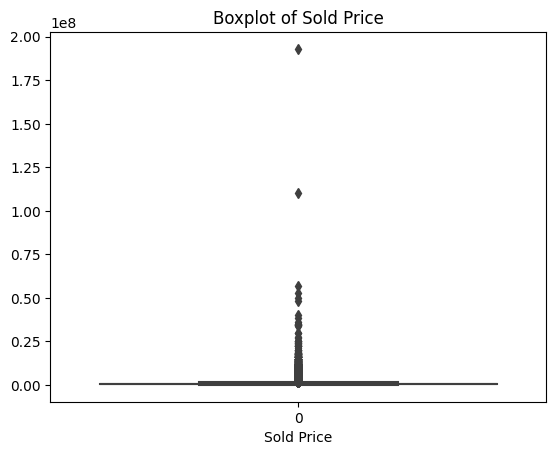

In [67]:
# Distribution of 'sold_price'
sn.histplot(data['sold_price'], kde=True)
plt.title('Distribution of Sold Price')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'sold_price'
sn.boxplot(data['sold_price'])
plt.title('Boxplot of Sold Price')
plt.xlabel('Sold Price')
plt.show()

In [68]:
# Identify outliers using IQR
Q1 = data['sold_price'].quantile(0.25)
Q3 = data['sold_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_filtered = data[(data['sold_price'] >= lower_bound) & (data['sold_price'] <= upper_bound)].copy()

# Apply log transformation using .loc to avoid SettingWithCopyWarning
data_filtered.loc[:, 'log_sold_price'] = np.log1p(data_filtered['sold_price'])


In [69]:
print(data.columns)

Index(['beds', 'sqft', 'sold_price', 'price_per_sqft',
       'Household Median Income', 'Total population',
       'age over 35 and less than 85',
       'age over 35 and less than 85 percentage ', 'Total housing units',
       'Occupied housing units/ Totla Household',
       'Occupied housing units Percent (%)', 'Owner-occupied',
       'Renter-occupied', 'Vacant housing units',
       'Vacant housing units Percent (%)', 'Homeowner vacancy rate',
       'Rental vacancy rate', 'related number of bedroom units',
       'related number of bedroom  (%)', 'style_encoded', 'zipcode_encoded',
       'year_built_encoded'],
      dtype='object')


In [70]:
#set X and y
feature_cols=['beds', 'sqft', 'price_per_sqft', 'Household Median Income', 'Total population',
'age over 35 and less than 85', 'age over 35 and less than 85 percentage ', 'Total housing units', 'Occupied housing units/ Totla Household', 'Occupied housing units Percent (%)',
'Owner-occupied', 'Renter-occupied', 'Vacant housing units', 'Vacant housing units Percent (%)', 'Homeowner vacancy rate', 'Rental vacancy rate', \
    'related number of bedroom units','related number of bedroom  (%)', 'style_encoded', 'zipcode_encoded', 'year_built_encoded']

X=data_filtered[feature_cols]
y=data_filtered['log_sold_price']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (282229, 22)
    Some column names had special characters which were removed...
#### Single_Label Regression problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Regression problem ####
    loading a sequential sample of 10000 rows into pandas 

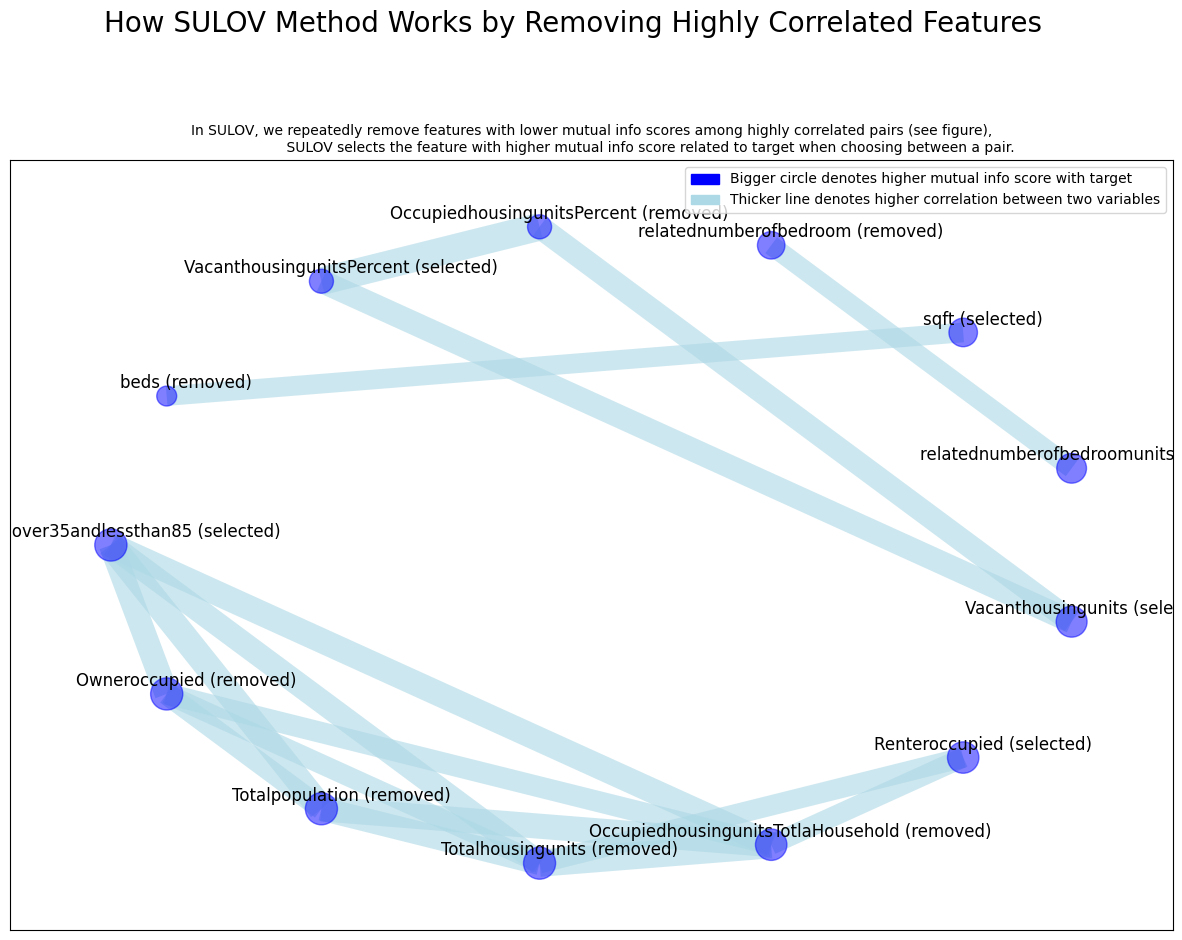

Time taken for SULOV method = 52 seconds
    Adding 0 categorical variables to reduced numeric variables  of 14
Final list of selected 14 vars after SULOV = ['price_per_sqft', 'HouseholdMedianIncome', 'ageover35andlessthan85percentage', 'Homeownervacancyrate', 'Rentalvacancyrate', 'style_encoded', 'zipcode_encoded', 'year_built_encoded', 'ageover35andlessthan85', 'Renteroccupied', 'Vacanthousingunits', 'relatednumberofbedroomunits', 'sqft', 'VacanthousingunitsPercent']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 5 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 20
        Selected: ['price_per_sqft', '

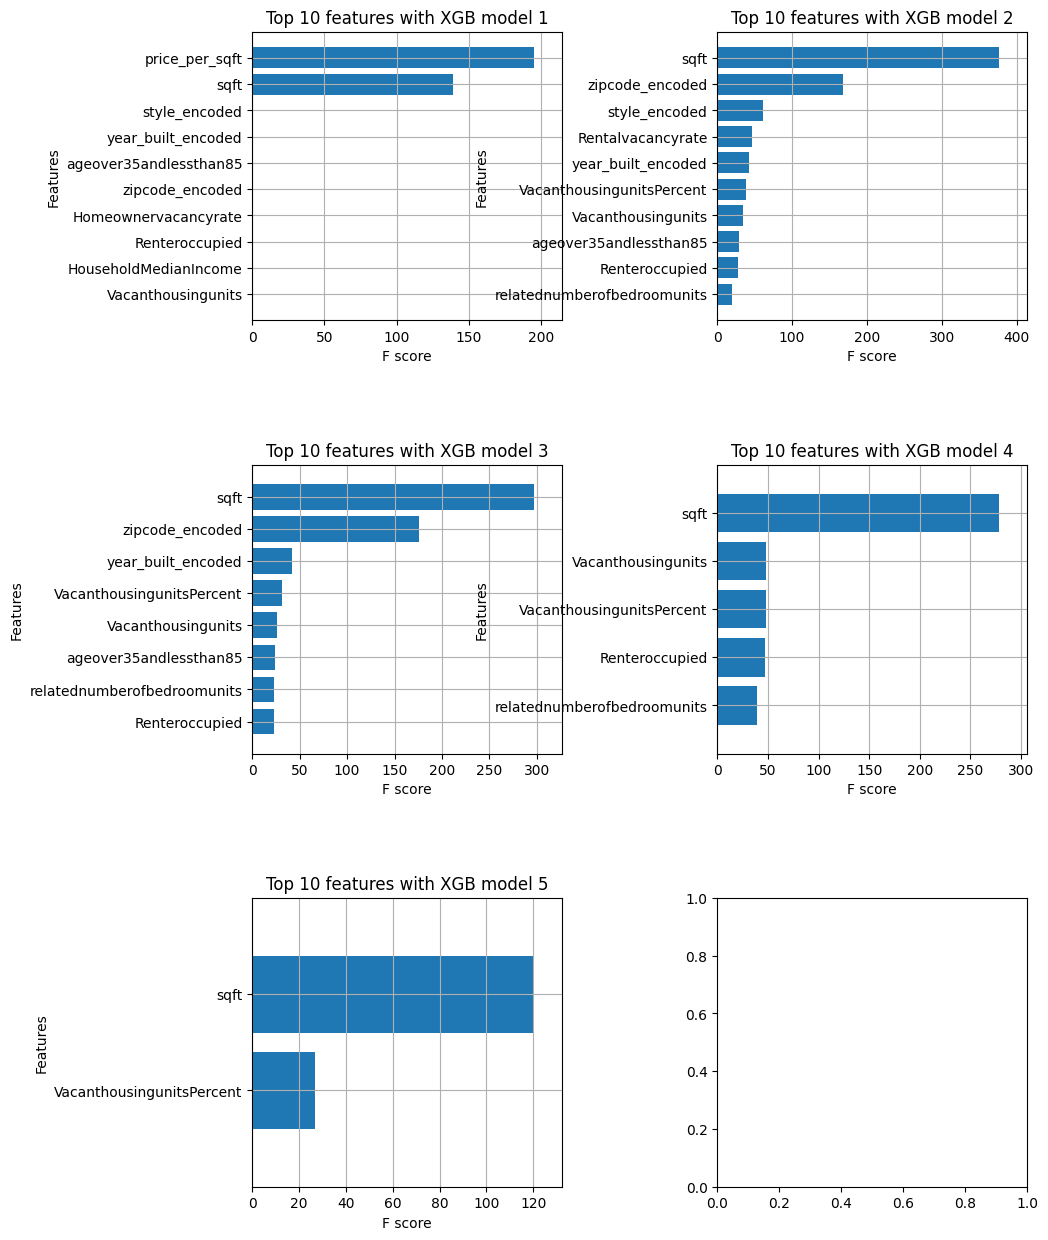

    Completed XGBoost feature selection in 7 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 10 important features:
['price_per_sqft', 'sqft', 'style_encoded', 'year_built_encoded', 'ageover35andlessthan85', 'zipcode_encoded', 'VacanthousingunitsPercent', 'Renteroccupied', 'Vacanthousingunits', 'relatednumberofbedroomunits']
Total Time taken for featurewiz selection = 86 seconds
Output contains a list of 10 important features and a train dataframe


In [71]:
from featurewiz import featurewiz
# automatic feature selection by using featurewiz package
data_for_feature_selection=pd.concat([X,y],axis=1)
target = 'log_sold_price'

features, train = featurewiz(data_for_feature_selection, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

#split data into feature and target
X_new = train.drop(['log_sold_price'],axis=1)
y_new = train.log_sold_price.values.astype(float)

#split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, stratify=None, random_state=1)

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197560 entries, 61433 to 132752
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   price_per_sqft                    197560 non-null  float64
 1   sqft                              197560 non-null  float64
 2   style_encoded                     197560 non-null  int64  
 3   year_built_encoded                197560 non-null  int64  
 4   age over 35 and less than 85      197560 non-null  float64
 5   zipcode_encoded                   197560 non-null  int64  
 6   Vacant housing units Percent (%)  197560 non-null  float64
 7   Renter-occupied                   197560 non-null  float64
 8   Vacant housing units              197560 non-null  float64
 9   related number of bedroom units   197560 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 16.6 MB


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score
import xgboost as xgb

In [74]:
# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(random_state=1)

# Define a parameter grid for hyperparameter tuning (Adjusted for XGBoost)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1],
    'colsample_bytree': [0.3, 0.7]
}


# Create the grid search object
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Create a model with the best parameters
best_xg_model = grid_search.best_estimator_

# Fit the best model on the training data
best_xg_model.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [75]:
from sklearn.metrics import r2_score, mean_squared_log_error

# Make predictions on the test data
log_predictions = best_xg_model.predict(X_test)

# Exponentiate the predictions to get them back on the original price scale
predictions = np.exp(log_predictions)

# Exponentiate the actual log prices to get them back on the original price scale
actual_prices = np.exp(y_test)

# Calculate evaluation metrics on the original price scale
mse = mean_squared_error(actual_prices, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predictions)
mad = median_absolute_error(actual_prices, predictions)

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((actual_prices - predictions) / actual_prices)) * 100

# RMSLE - Root Mean Squared Logarithmic Error
rmsle = np.sqrt(mean_squared_log_error(actual_prices, predictions))

# EVS - Explained Variance Score
evs = explained_variance_score(actual_prices, predictions)

# R2 - Coefficient of Determination
r2 = r2_score(actual_prices, predictions)

# Calculate the standard deviation of the actual prices
std_actual_prices = np.std(actual_prices)

# Calculate Standardized Prediction Difference (SPD)
spd = (actual_prices - predictions) / std_actual_prices
mean_spd = np.mean(spd)


# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}')
print(f'RMSLE: {rmsle}')
print(f'EVS: {evs}')
print(f'R^2: {r2}')
print(f'Mean SPD: {mean_spd}')

# Extract and print feature importances
feature_importances = best_xg_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

print("Feature importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")


MSE: 95391057.77287096
RMSE: 9766.834583060725
MAE: 5910.061019787355
MAD: 3903.4687500001746
MAPE: 1.1267367832749289
RMSLE: 0.01656141225669353
EVS: 0.9988525586054066
R^2: 0.9988512565416672
Mean SPD: 0.001141080075811672
Feature importances:
price_per_sqft: 0.42606428265571594
sqft: 0.3029816448688507
style_encoded: 0.14118552207946777
zipcode_encoded: 0.07534312456846237
year_built_encoded: 0.023891126736998558
Vacant housing units Percent (%): 0.01183087844401598
related number of bedroom units: 0.008738888427615166
Renter-occupied: 0.004906854126602411
Vacant housing units: 0.0030002440325915813
age over 35 and less than 85: 0.0020574680529534817


In [76]:
#load data
path = os.path.join(os.getcwd(), "for_sale_cleaned_up_11.21.23_updated.xlsx")
ori_for_sale = pd.read_excel(path)


for_sale= ori_for_sale.drop(["property_url","mls","mls_id","status","street","unit","city","state","full_baths","half_baths","days_on_mls",\
                "list_price","list_date","last_sold_date","lot_sqft","latitude","longitude","stories","hoa_fee","parking_garage","metro_area"],axis=1)


In [77]:
# Fit and transform style,zipcode, year_built columns to categorical data
for_sale['style_encoded'] = label_encoder.fit_transform(for_sale['style'].astype(str))
for_sale['zipcode_encoded'] = label_encoder.fit_transform(for_sale['zip_code'].astype(str))
for_sale['year_built_encoded'] = label_encoder.fit_transform(for_sale['year_built'].astype(str))

#drop style,zipcode, year_built columns
for_sale=for_sale.drop(["zip_code","year_built"],axis=1)


In [44]:
print(for_sale.columns)

Index(['style', 'beds', 'sqft', 'sold_price', 'price_per_sqft',
       'HOUSEHOLD MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)',
       'Total population', 'age over 35 and less than 85',
       'age over 35 and less than 85 percentage ', 'Total housing units',
       'Occupied housing units/ Totla Household',
       'Occupied housing units Percent (%)', 'Owner-occupied',
       'Renter-occupied', 'Vacant housing units',
       'Vacant housing units Percent (%)', 'Homeowner vacancy rate',
       'Rental vacancy rate', 'related bedroom number units',
       'related bedroom number  Percent  (%)', 'style_encoded',
       'zipcode_encoded', 'year_built_encoded'],
      dtype='object')


In [78]:
# Renaming multiple columns
for_sale.rename(columns={'related bedroom number units': 'related number of bedroom units'}, inplace=True)

In [79]:
# Retrieve the feature names from the trained model
trained_model_feature_names = best_xg_model.feature_names_in_

# Reorder the columns in X_for_sale to match the order of the trained model's features
X_for_sale = for_sale[trained_model_feature_names]

In [80]:
# Make predictions
predictions = best_xg_model.predict(X_for_sale)

# predicted housing prices
housing_pred_v = np.exp(predictions)

# Add rounded predictions to the dataframe
for_sale['predicted_value'] = housing_pred_v.astype(int)

# Save or display the results
for_sale.to_csv('XGBoost_prediction_final.csv', index=False)